# Introduction to NumPy

In [37]:
import numpy as np
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))

In [ ]:
np.any(x>8)
np.all(x<8, axis=1)

**A quick warning!!**  
Python has built-in sum(), any(), and all() functions. These have a different syntax than the NumPy versions, and in particular will fail or produce unintended results when used on multidimensional arrays. Be sure that you are using np.sum(), np.any(), and np.all() for these examples!

In [ ]:
np.sum((inches > 0.5) & (inches < 1))
np.sum(~( (inches <= 0.5) | (inches >=1) ))

Note that the paretheses here are important-because of operator precedence rules, with paretheses removed this expression would be evaluated as follows, which results in an error:

inches > (0.5 & inches) < 1

**Aside: Using the Keywords and/or Versus the Operators &/|**  
* The difference is this: and and or gauge the truth or falsehood of entire object, while & and | refer to bits within each object.  
* When doing a Boolean expression on a given array, you should use | or & rather than or or and. Trying to evaluate the truth or falsehood of the entire array will give ValueError.  
* When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where 1 = True and 0 = False.

**Fancy Indexing**  
When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed.

In [57]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
ind = np.array([[3, 7], [4, 5]])     # Using lists would get error!
x[ind]

array([[71, 86],
       [60, 20]])

The pairing of indices in fancy indexing follows all the broadcasting rules. So, for example, if we combine a column vector and a row vector wthin the indices, we get a two-dimensional result:

In [59]:
X = np.arange(12).reshape((3, 4))
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row[:, np.newaxis], col]     # Compare it with X[row, col]!

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

**Combined Indexing**

In [66]:
X[2, [2, 0, 1]]
X[1:, [2, 0, 1]]
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

**Modifying Values with Fancy Indexing**

In [72]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
indices = np.random.choice(X.shape[0], 20, replace=False)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [73]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
x[i] -= 10

x = np.zeros(10)
x[[0, 0]] = [4, 6]
x
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

* Notice, though, that repeated indices with those operations can cause some potentially unexpected results.  
Where did the 4 go? The result of this operation is to first assign x[0] = 4, followed by x[0] =6. The result, of course, is that x[0] contains the value 6.
* You might expect that x[3] would contain the value 2, and x[4] would contain the value 3, as this is how many times each index is repeated. Why is this not the case? Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1. x[i] + 1 is evaluated, and then the result is assigned to the indices in x.

So what if you want the other behavior where the operation is repeated? For this, you can use the at() method of ufuncs:

In [74]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

**Binning Data**

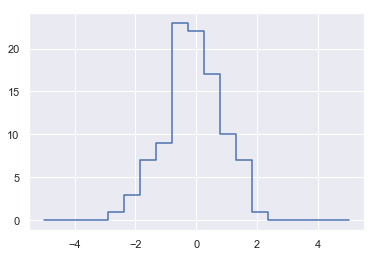

In [95]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

import matplotlib.pyplot as plt
import seaborn
seaborn.set()   # for plot styling
%matplotlib inline
plt.plot(bins, counts, linestyle='steps')

Matplotlib provides the plt.hist() routine, which does the same thing in a single line:

In [ ]:
plt.hist(x, bins, histtype='step')

To compute the bining, matplotlib uses the **np.histogram** function, which does a very similar computation to what we did before.

In [ ]:
counts, edges = np.histogram(x, bins)